<a href="https://colab.research.google.com/github/khmelkoff/BackSlices/blob/master/TraxRuSummarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install trax

     |████████████████████████████████| 522kB 4.2MB/s 
     |████████████████████████████████| 215kB 6.8MB/s 
     |████████████████████████████████| 3.4MB 8.9MB/s 
     |████████████████████████████████| 1.2MB 51.3MB/s 
     |████████████████████████████████| 71kB 6.4MB/s 
     |████████████████████████████████| 3.8MB 52.0MB/s 
     |████████████████████████████████| 1.8MB 47.9MB/s 
     |████████████████████████████████| 368kB 55.0MB/s 
     |████████████████████████████████| 890kB 53.2MB/s 
     |████████████████████████████████| 2.9MB 49.8MB/s 


In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
# from unicodedata import normalize
import sentencepiece as spm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/lenta-ru-news.csv.zip')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914/09/16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914/09/16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914/09/17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914/09/17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914/09/18


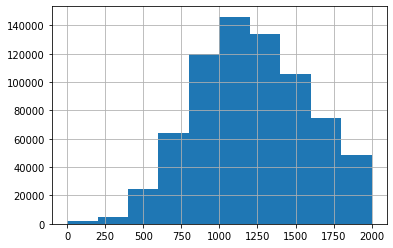

In [6]:
data['text_len'] = [len(x) if not type(x)==float else 0 for x in data.text]
data.text_len[data.text_len < 2000].hist()

In [7]:
# text_full = []  # full text list for train senttence piece tokenizer
text_pairs = [] # paired data for train the model, format: (title, text)
for i in tqdm(range(data.shape[0])):
    if data.iloc[i, 6] >= 500 and data.iloc[i, 6] <= 2000:
        # text_full.append(data.iloc[i, 1] + '\n' + data.iloc[i, 2])
        text_pairs.append((data.iloc[i, 1], data.iloc[i, 2]))

# save full text to text file        
# with open('full_text.txt', 'w', encoding='utf-8') as file:
#     file.write('\n'.join(text_full))  

100%|██████████| 800975/800975 [01:16<00:00, 10437.18it/s]


In [8]:
# train tokenizer
# spm.SentencePieceTrainer.train('--input=full_text.txt --pad_id=0 --bos_id=1 --eos_id=2 --unk_id=3 \
#                                --model_prefix=bpe --vocab_size=32000 --model_type=bpe')
sp = spm.SentencePieceProcessor()
sp.load('/content/drive/MyDrive/bpe.model')

True

In [9]:
s0 = text_pairs[10][1]
print(s0[:300])

Бывший шеф Службы безопасности президента  Александр  Коржаков,  лидер  Движения  в поддержку армии Виктор Илюхин и руководители ряда других движений возглавят блок патриотических сил "Русский дом". Выступая сегодня на пресс-конференции в Москве, руководитель "Союза соотечественников - "Отчизна" Бор


In [10]:
# tokenizer check
print('encode: text => id:')
print(sp.encode_as_pieces(s0[:300]))
print('')
print(sp.encode_as_ids(s0[:300]))
print('')
print('decode: id => text:')
print(sp.decode_pieces(sp.encode_as_pieces(s0[:300])))
print('')
print(f'Beginning of sentence id: {sp.bos_id()}')
print(f'Pad id: {sp.pad_id()}')
print(f'End of sentence id: {sp.eos_id()}')
print(f'Unknown id: {sp.unk_id()}')
print(f'Vocab size: {sp.vocab_size()}')      

encode: text => id:
['▁Бывший', '▁шеф', '▁Службы', '▁безопасности', '▁президента', '▁Александр', '▁Кор', 'жа', 'ков', ',', '▁лидер', '▁Дви', 'жения', '▁в', '▁поддержку', '▁армии', '▁Виктор', '▁Илю', 'хин', '▁и', '▁руководители', '▁ряда', '▁других', '▁движений', '▁возгла', 'вят', '▁блок', '▁патрио', 'тических', '▁сил', '▁"', 'Русский', '▁дом', '".', '▁Выступая', '▁сегодня', '▁на', '▁пресс', '-', 'конференции', '▁в', '▁Москве', ',', '▁руководитель', '▁"', 'Союза', '▁соотечествен', 'ников', '▁-', '▁"', 'От', 'чи', 'зна', '"', '▁Бор']

[3923, 22030, 13690, 1407, 886, 1869, 3814, 180, 136, 31894, 1694, 12992, 932, 6, 3708, 3298, 4201, 29054, 7514, 19, 12023, 5343, 1485, 21803, 2138, 4557, 7442, 15948, 6246, 1151, 83, 16139, 2867, 302, 16527, 3303, 27, 782, 31910, 5288, 6, 1066, 31894, 4425, 83, 24745, 10950, 452, 247, 83, 8234, 101, 286, 31905, 9385]

decode: id => text:
Бывший шеф Службы безопасности президента Александр Коржаков, лидер Движения в поддержку армии Виктор Илюхин и руководите

In [11]:
uid = 3814
spiece = "\u2581Кор"
unknown = "_НЕИЗВЕСТНОСТЬ_"

# id <=> piece conversion
print(f'SentencePiece for ID {uid}: {sp.id_to_piece(uid)}')
print(f'ID for Sentence Piece {spiece}: {sp.piece_to_id(spiece)}')

# returns 0 for unknown tokens (we can change the id for UNK)
print(f'ID for unknown text {unknown}: {sp.piece_to_id(unknown)}')

SentencePiece for ID 3814: ▁Кор
ID for Sentence Piece ▁Кор: 3814
ID for unknown text _НЕИЗВЕСТНОСТЬ_: 3


In [12]:
# vocab begin and end test
print('\nId\tSentP\tControl?')
print('------------------------')
for uid in range(7):
    print(uid, sp.id_to_piece(uid), sp.is_control(uid), sep='\t')
    
for uid in range(sp.vocab_size()-7,sp.vocab_size()):
    print(uid, sp.id_to_piece(uid), sp.is_control(uid), sep='\t')


Id	SentP	Control?
------------------------
0	<pad>	True
1	<s>	True
2	</s>	True
3	<unk>	False
4	▁п	False
5	ст	False
6	▁в	False
31993	V	False
31994	x	False
31995	J	False
31996	z	False
31997	K	False
31998	U	False
31999	X	False
